# Домашнее задание "Визуализация данных в Python"
Построить 5 графиков по выбранным данным.

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

### Подключим необходимые библиотеки и сконфигурируем параметры отображения графиков

In [1]:
import pandas as pd

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

import matplotlib.pyplot as plt

In [75]:
import seaborn as sns
sns.set(color_codes=True)

### Описание датасета

Датасет "Berlin Airbnb Data, Investigating Airbnb activity in Berlin, Germany" (https://www.kaggle.com/brittabettendorf/berlin-airbnb-data#calendar_summary.csv) представляет собой наборы данных на 7 ноября 2018 года и содержат подробные данные о списках, обзорные данные и календарные данные о текущих списках Airbnb в Берлине.

#### Атрибуты таблицы:

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365v

In [22]:
# прочитаем датасет 
ds = pd.read_csv('listings_airbnb_Berlin.csv')

In [3]:
ds.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [16]:
ds.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
id                                22552 non-null int64
name                              22493 non-null object
host_id                           22552 non-null int64
host_name                         22526 non-null object
neighbourhood_group               22552 non-null object
neighbourhood                     22552 non-null object
latitude                          22552 non-null float64
longitude                         22552 non-null float64
room_type                         22552 non-null object
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64

В датасете 22 552 элементов, несколько типов аппартиментов

### определяем виды жилья и количество каждого вида

In [41]:
ds['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [42]:
ds_amount_of_every_room_type = ds['room_type'].value_counts().reset_index()
ds_amount_of_every_room_type

,index,room_type
0,Private room,11534
1,Entire home/apt,10722
2,Shared room,296


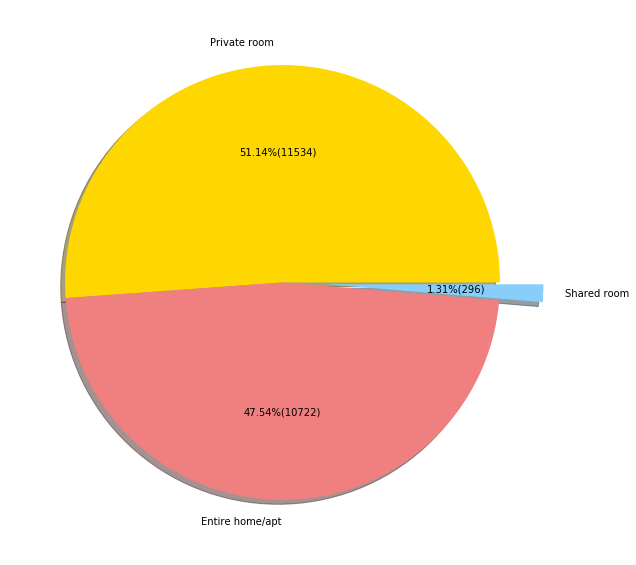

<Figure size 720x720 with 0 Axes>

In [56]:
labels = ds_amount_of_every_room_type['index']
#sizes = [280, 302, 8]
sizes = ds_amount_of_every_room_type['room_type']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct = lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*sizes.sum()), shadow=True, startangle=135)
plt.figure(figsize=(10,10))

#plt.rcParams["figure.figsize"]= (10,10)
#plt.axis('rooms_count')
plt.show()


# df.apply(lambda x: x * x * x)
# df.apply(pow, 3)

# power = lambda x: x * x

# def power(x):
#     return x * x

# power(5)

Из выше перечисленных расчетов видно, что в датасете всего 3 вида жилья: Entire home/apt, Private room, Shared room
Больше всего сдаю посуточно в аренду комнаты(Private room) в квартире - 11534 шт, на втором месте расположились квартиры (Entire home/apt) - 10722 и замыкают список комнаты (Shared room), в которых проживают хозяин квартиры и гость - 296. Но, как показывает круговая диаграмма, количество Shared room по сравнению с первыми двумя позициями ничтожна мала.

### Определение средней цены покаждому виду жилья

In [5]:
ds_average_price_of_room_type = (ds.filter(items=['room_type', 'price'])
                                 .groupby('room_type')
                                 .agg('mean')
                                 .reset_index()
                                )
ds_average_price_of_room_type

,room_type,price
0,Entire home/apt,83.348909
1,Private room,52.479105
2,Shared room,51.564189


In [7]:
ds_average_price_of_room_type['room_type']

0    Entire home/apt
1       Private room
2        Shared room
Name: room_type, dtype: object

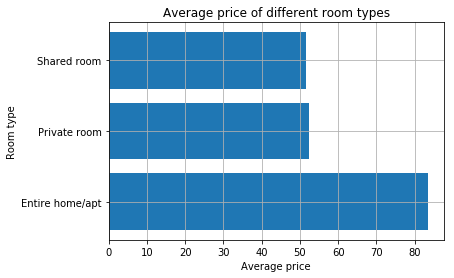

In [8]:
plt.barh(ds_average_price_of_room_type['room_type'], ds_average_price_of_room_type['price'])
plt.grid() 
plt.ylabel('Room type')
plt.xlabel('Average price')
plt.title('Average price of different room types')
plt.show()

Данный анализ показал, что в среднем цена на отдельную комнату и совмещенную комнату практически одинаковая. Однако цена на отдельные аппартаменты на много выше. Для определения факторов, влияющих на формирование цены нужен полный датасет.

In [9]:
ds_average_price_of_room_type = (ds.filter(items=['room_type', 'minimum_nights'])
                                 .groupby('room_type')
                                 .agg('mean')
                                 .reset_index()
                                )
ds_average_price_of_room_type

,room_type,minimum_nights
0,Entire home/apt,10.451035
1,Private room,4.182677
2,Shared room,3.739865


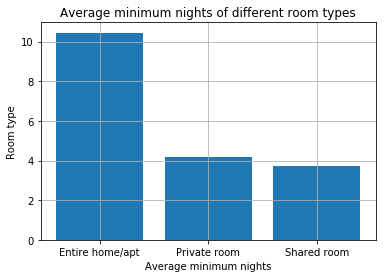

In [10]:
plt.bar(ds_average_price_of_room_type['room_type'], ds_average_price_of_room_type['minimum_nights'])
plt.grid() 
plt.ylabel('Room type')
plt.xlabel('Average minimum nights')
plt.title('Average minimum nights of different room types')
plt.show()

Как показывает график, среднее минимальное количество дней/ночей у аппартаментов значительно выше чем у других категорий. Можно предположить, что аппартаменты подоходят наилучшим образом для продолжительного прибывания в городе и дают возможность заселять компании или семьи с детьми. Как показывает практика, такие группы туристов останавливаются в городах на продолжительное время для более вдумчивого изучения местности без смены места дислокации.

### Определения 10 самых крупных владельцев аппартаментов, сдающих посуточно на Air B&B

In [72]:
top_10_of_appartmens_owner = ds.groupby(['host_id']).agg({'id': 'count'}).sort_values(by='id', ascending=False).reset_index().head(10)
top_10_of_appartmens_owner

,host_id,id
0,1625771,45
1,8250486,43
2,2293972,30
3,8912086,26
4,35700774,19
5,161175249,19
6,59442407,19
7,79430806,19
8,54942921,18
9,55538702,17


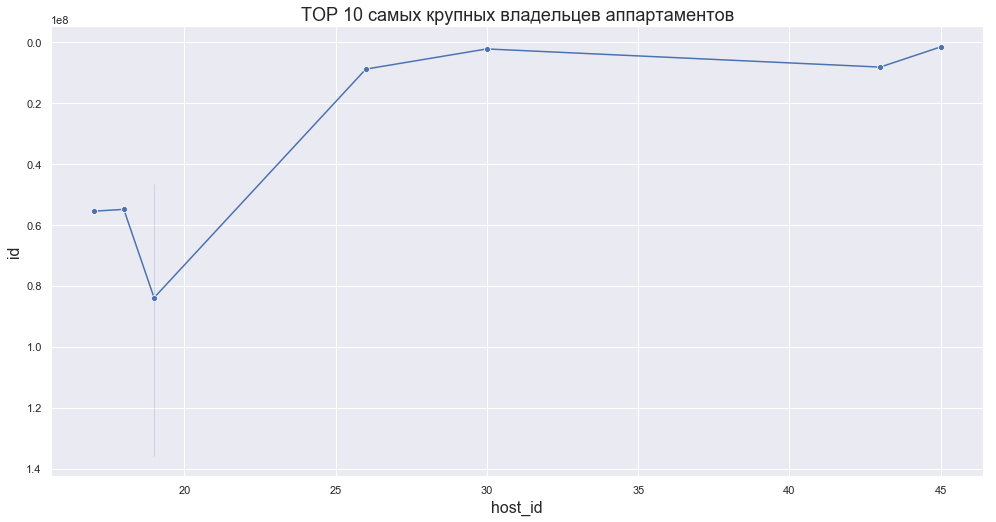

In [81]:
g = sns.lineplot(x="id", y="host_id", data=top_10_of_appartmens_owner, marker="o")
g.set_title('TOP 10 самых крупных владельцев аппартаментов', fontsize=18)
g.set_ylabel('id', fontsize=16)
g.set_xlabel('host_id', fontsize=16)

plt.gcf().set_size_inches(16.7, 8.27)
plt.gca().invert_yaxis()

In [11]:
ds_average_price_of_room_type = (ds.filter(items=['room_type','minimum_nights'])
                                 .groupby('room_type')
                                 .agg('count')
                                 .rename(columns={'minimum_nights':'rooms_count'})
                                 .reset_index()
                                )
ds_average_price_of_room_type

,room_type,rooms_count
0,Entire home/apt,10722
1,Private room,11534
2,Shared room,296


In [78]:
import folium
from folium.plugins import MarkerCluster
m = folium.Map(location=[52.534537, 13.402557], zoom_start=11)

In [79]:
marker_cluster = MarkerCluster().add_to(m)
i = 0

for index, row in ds.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['price'],
        icon=folium.Icon(color='green', icon='icon-dropbox'),
    ).add_to(marker_cluster)
    i += 1
    if i == 100:
        break

# folium.Marker(
#     location=[44.67, -73.94],
#     popup='Add popup text here.',
#     icon=folium.Icon(color='red', icon='remove-sign'),
# ).add_to(marker_cluster)

# folium.Marker(
#     location=[44.67, -71.94],
#     popup='Add popup text here.',
#     icon=None,
# ).add_to(marker_cluster)

m